In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_dir = os.path.join(os.getcwd(), 'openpowerlifting-2020-02-15', 'openpowerlifting-2020-02-15.csv')
data = pd.read_csv(file_dir)

# list(data.columns)

In [63]:

data['MaxDL'] = data[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)

ipfList = ['AfricanPF', 'AsianPF', 'CommonwealthPF', 'EPF', 'FESUPO', 'NAPF', 'NordicPF',
    'OceaniaPF', 'ORPF', 'USAPL', 'BP', 'EPA', 'ScottishPL', 'WelshPA', 'FALPO', 
    'CPU', 'HPLS', 'CSST', 'DSF', 'SVNL', 'FFForce', 'BVDK', 'KRAFT', 'IrishPF', 'JPA',
    'KPF', 'LPF', 'FEMEPO', 'NPB', 'NZPF', 'NSF', 'PAP', 'PZKFiTS', 'FPR', 'PLZS', 
    'AEP', 'SSF', 'ThaiPF', 'UkrainePF', 'IPF', 'VPF']
ipfdf = data[data['Federation'].isin(ipfList)]

ipfdf = ipfdf[ipfdf['Equipment'].isin(['Raw'])]
ipfdf = ipfdf[ipfdf['Event'] == 'SBD']
ipfdf = ipfdf[ipfdf['Sex'] == 'M']

nonipfdf = data[data['Federation'].isin(ipfList) == False]
nonipfdf = nonipfdf[nonipfdf['Equipment'].isin(['Raw'])]
nonipfdf = nonipfdf[nonipfdf['Event'] == 'SBD']
nonipfdf = nonipfdf[nonipfdf['Sex'] == 'M']

nonipftesteddf = nonipfdf[nonipfdf['Tested'] == 'Yes']


In [64]:
# nonipftesteddf.sort_values(by='MaxDL', ascending=False)

nonipftesteddf['MaxDL'].describe


<bound method NDFrame.describe of 1224         NaN
1255         NaN
1256         NaN
1276         NaN
1315         NaN
           ...  
1774004    225.0
1774005    200.0
1774006    220.0
1774007    265.0
1774008    242.5
Name: MaxDL, Length: 40575, dtype: float64>

In [65]:
dltesteddf = ipfdf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dltesteddf = dltesteddf[~np.isnan(dltesteddf)]
dltesteddf = [item for item in dltesteddf if item >= 0]


dlnonipftested = nonipftesteddf[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)
dlnonipftested = dlnonipftested[~np.isnan(dlnonipftested)]
dlnonipftested = [item for item in dlnonipftested if item >= 0]


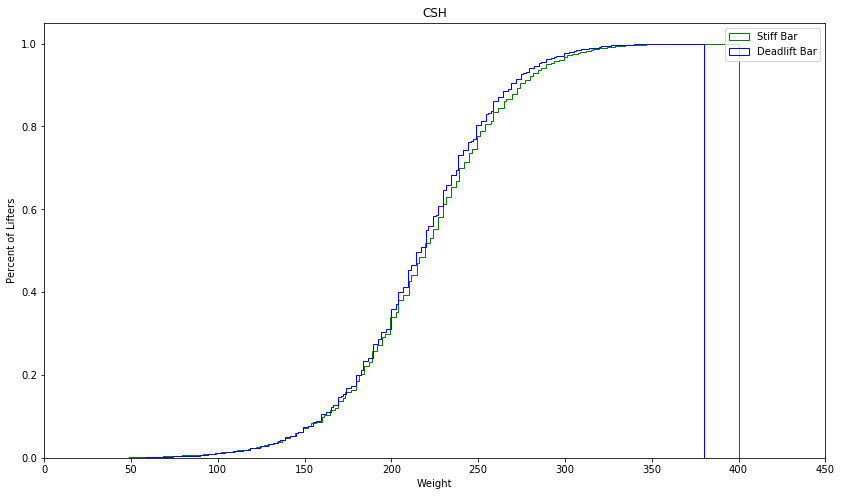

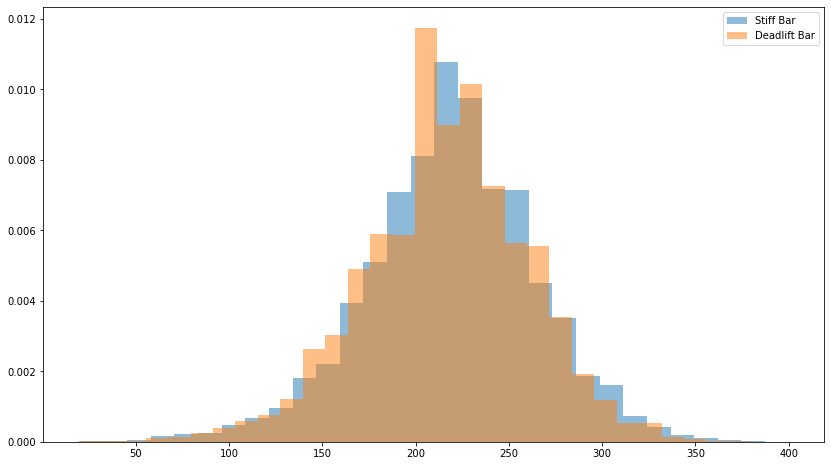

In [66]:
# plt.hist(dltesteddf, bins=30)
# plt.xlim(0, 450)
# plt.title('Stiff Bar DLs')
# plt.ylabel('# Lifters')
# plt.xlabel('Weight')
# plt.show()

# plt.hist(dlnonipftested, bins=30)
# plt.xlim(0, 450)
# plt.title('Deadlift Bar DLs')
# plt.ylabel('# Lifters')
# plt.xlabel('Weight')
# plt.show()

plt.figure(figsize=(14,8))
plt.hist(dltesteddf, bins=250, histtype='step', normed=1, cumulative=True, color='green', label='Stiff Bar')
plt.hist(dlnonipftested, bins=250, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')
plt.xlim(0, 450)
plt.legend(loc='left')
plt.title('CSH')
plt.ylabel('Percent of Lifters')
plt.xlabel('Weight')
plt.show()

plt.figure(figsize=(14,8))
plt.hist(dltesteddf, bins=30, alpha=0.5, normed=1, label='Stiff Bar')
plt.hist(dlnonipftested, bins=30, alpha=0.5, normed=1, label='Deadlift Bar')
plt.legend(loc='upper right')
plt.show()


In [67]:
from scipy import stats

stats.ks_2samp(dltesteddf, dlnonipftested)

Ks_2sampResult(statistic=0.03318555453032168, pvalue=1.2117251709991842e-18)

In [75]:
boxplotdf = pd.DataFrame({'Stiff Bar': [np.array(dltesteddf)],'DL Bar': [np.array(dlnonipftested)]})

# plt.boxplot(dltesteddf)
# # plt.boxplot(nonipftesteddf)
# plt.legend(loc='left')
# plt.show()

boxplotdf

,Stiff Bar,DL Bar
0,"[190.0, 200.0, 120.0, 230.0, 215.0, 210.0, 200...","[115.0, 75.0, 120.0, 110.0, 200.5, 150.0, 122...."


<Figure size 432x288 with 0 Axes>

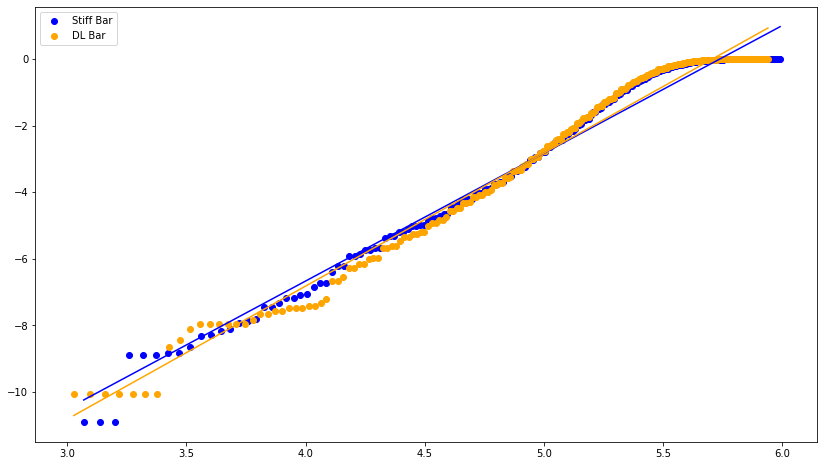

In [69]:
yStiff, xStiff, axStiff = plt.hist(dltesteddf, bins=250, histtype='step', normed=1, cumulative=True, color='green', label='Stiff Bar')

yDL, xDL, axDL = plt.hist(dlnonipftested, bins=250, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')

plt.clf()

xStiff = np.delete(xStiff, 0)
xDL = np.delete(xDL, 0)
logxStiff = np.log(xStiff)
logyStiff = np.log(yStiff)
logxDL = np.log(xDL)
logyDL = np.log(yDL)

mStiff, bStiff = np.polyfit(logxStiff, logyStiff, 1)
mDL, bDL = np.polyfit(logxDL, logyDL, 1)

plt.figure(figsize=(14,8))
plt.scatter(logxStiff, logyStiff, label = 'Stiff Bar', color = 'blue')
plt.plot(logxStiff, mStiff*logxStiff + bStiff, color = 'blue')
plt.scatter(logxDL, logyDL, label = 'DL Bar', color = 'orange')
plt.plot(logxDL, mDL*logxDL + bDL, color = 'orange')

plt.legend(loc='left')
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('Weight')
# plt.ylabel('y')
plt.show()

